In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as rf
import xgboost as xgb
import math
import warnings
warnings.filterwarnings('ignore')


In [2]:
# data load
all_df = pd.read_csv('../data/smart_farm.csv')
all_df  


,Unnamed: 0,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,1,2021,11,26,0,0,-2.7,5.8,67,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2,2021,11,26,0,1,-2.9,5.8,67,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,3,2021,11,26,0,2,-3.0,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,4,2021,11,26,0,3,-3.0,5.7,67,1.3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,5,2021,11,26,0,4,-2.8,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,152636,2022,3,20,23,55,-3.0,6.2,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,152637,2022,3,20,23,56,-3.2,6.2,61,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,152638,2022,3,20,23,57,-3.2,6.1,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,152639,2022,3,20,23,58,-3.3,6.1,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [3]:
all_df.columns

Index(['Unnamed: 0', 'smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd',
       'smart_farm.hh', 'smart_farm.nn', 'smart_farm.insolation',
       'smart_farm.out_tmperature', 'smart_farm.out_humidity',
       'smart_farm.wind_speed', 'smart_farm.wind_direction',
       'smart_farm.in_tmperature', 'smart_farm.in_humidity',
       'smart_farm.shield_light_h', 'smart_farm.shield_tmperature_h',
       'smart_farm.shield_energy_h', 'smart_farm.shield_energy_v',
       'smart_farm.exhaust_fan', 'smart_farm.ceiling',
       'smart_farm.floating_fan', 'smart_farm.fan_coil_b_site',
       'smart_farm.ventilation_temperature_control',
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply'],
      dtype='object')

In [4]:
# add index name on first column
all_df.columns.values[0] = 'tag'
all_df


,tag,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,1,2021,11,26,0,0,-2.7,5.8,67,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2,2021,11,26,0,1,-2.9,5.8,67,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,3,2021,11,26,0,2,-3.0,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,4,2021,11,26,0,3,-3.0,5.7,67,1.3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,5,2021,11,26,0,4,-2.8,5.7,67,0.9,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,152636,2022,3,20,23,55,-3.0,6.2,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,152637,2022,3,20,23,56,-3.2,6.2,61,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,152638,2022,3,20,23,57,-3.2,6.1,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,152639,2022,3,20,23,58,-3.3,6.1,61,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [5]:
for colname in all_df.columns:
    if colname.startswith('smart'):
        newName = colname[11:] # remove smart_farm.
    else :
        newName = colname[0:]
    print(newName) 
    all_df.rename(columns={colname:newName},inplace=True)

tag
yy
mm
dd
hh
nn
insolation
out_tmperature
out_humidity
wind_speed
wind_direction
in_tmperature
in_humidity
shield_light_h
shield_tmperature_h
shield_energy_h
shield_energy_v
exhaust_fan
ceiling
floating_fan
fan_coil_b_site
ventilation_temperature_control
heating_temperature_set_up
heat_supply


In [78]:
# 날짜 Index가 여러개 있어서 하나로 정리하고싶을 때 실행
# date = all_df[['yy','mm','dd','hh','nn']].astype(str).apply('-'.join,axis=1)
date = all_df[['yy','mm','dd']].astype(str).apply('-'.join,axis=1)
# time = all_df[['hh','nn']].astype(str).apply(':'.join,axis=1)
time = all_df[['hh','nn']].astype(str).apply(':'.join,axis=1)
datetime = date + ' ' + time
if 'datetime' in all_df: 
    del all_df['datetime']
all_df.insert(loc=1,column='datetime',value=datetime)
all_df['datetime'] = pd.to_datetime(all_df['datetime'],format='%Y-%m-%d %H:%M', errors='raise')

In [79]:
if 'date' in all_df: 
    del all_df['date']
# all_df['date'] = pd.to_datetime(all_df['date'])
all_df.insert(loc=2,column='date',value=date)
all_df['date'] = pd.to_datetime(all_df['date'],format='%Y-%m-%d', errors='raise')

In [82]:
if 'time' in all_df: 
    del all_df['time']
# time = time + ':00'
all_df.insert(loc=3,column='time',value=time)
# # all_df['time'] = pd.to_datetime(all_df['time']) #,format='%H:%M:%S', errors='raise')
# all_df['time'] = pd.Timestamp(all_df['time'], unit='m')
all_df

,tag,datetime,date,time,yy,mm,dd,hh,nn,insolation,...,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
0,1,2021-11-26 00:00:00,2021-11-26,0:0,2021,11,26,0,0,-2.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2,2021-11-26 00:01:00,2021-11-26,0:1,2021,11,26,0,1,-2.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,3,2021-11-26 00:02:00,2021-11-26,0:2,2021,11,26,0,2,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,4,2021-11-26 00:03:00,2021-11-26,0:3,2021,11,26,0,3,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,5,2021-11-26 00:04:00,2021-11-26,0:4,2021,11,26,0,4,-2.8,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,152636,2022-03-20 23:55:00,2022-03-20,23:55,2022,3,20,23,55,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,152637,2022-03-20 23:56:00,2022-03-20,23:56,2022,3,20,23,56,-3.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,152638,2022-03-20 23:57:00,2022-03-20,23:57,2022,3,20,23,57,-3.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,152639,2022-03-20 23:58:00,2022-03-20,23:58,2022,3,20,23,58,-3.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [83]:
all_df['heat_supply'].isnull().sum()

21177

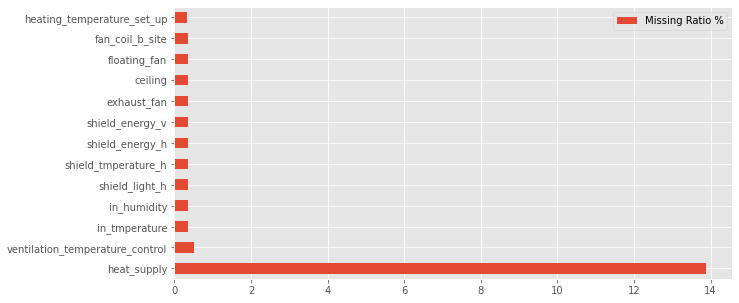

In [84]:

# all_df.isna().sum()[all_df.isna().sum()>0].plot(kind='bar','date')

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(all_df)
plot_width, plot_height = (10,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

<AxesSubplot:xlabel='date'>

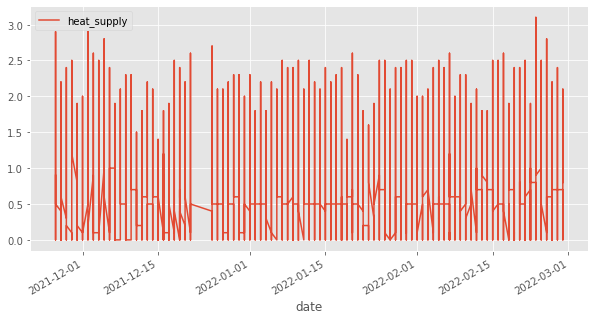

In [85]:
all_df.plot(y='heat_supply',x='date')



In [86]:
# make sum_heat_supply / day 
# including # of null info

sum_df = all_df.groupby('date').agg({'heat_supply': 'sum'})
sum_df


,heat_supply
date,
2021-11-26,646.0
2021-11-27,595.3
2021-11-28,704.5
2021-11-29,381.1
2021-11-30,569.3
...,...
2022-03-13,0.0
2022-03-15,0.0
2022-03-18,0.0


In [87]:
all_df.isnull().sum() 

tag                                    0
datetime                               0
date                                   0
time                                   0
yy                                     0
mm                                     0
dd                                     0
hh                                     0
nn                                     0
insolation                             0
out_tmperature                         0
out_humidity                           0
wind_speed                             0
wind_direction                         0
in_tmperature                        526
in_humidity                          526
shield_light_h                       526
shield_tmperature_h                  526
shield_energy_h                      526
shield_energy_v                      526
exhaust_fan                          526
ceiling                              526
floating_fan                         526
fan_coil_b_site                      526
ventilation_temp

<AxesSubplot:xlabel='date'>

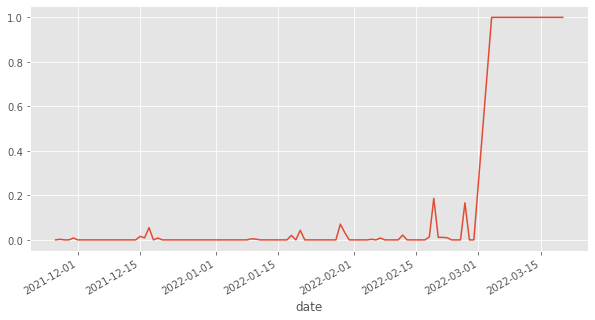

In [88]:
def sum_null_df(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        return df.isnull().sum()
    else:
        print('No NAs found')
# sum_null_df(all_df)

def total_null_df(df:pd.DataFrame):
    return pd.DataFrame({
        'sum_null': df.isnull().sum()
    })
# all_df.groupby(['date']).agg({'heat_supply':'sum'})
# all_df.groupby(['date']).agg({'heat_supply':sum_null_df,'heat_supply':'sum'})
# sum_null_df(all_df.groupby(['date']))
all_df.groupby('date')['heat_supply'].apply(lambda x: x.isnull().sum() / 1440).plot()
# all_df[all_df['date'].between('2021-12-26','2022-3-1')].groupby('date')['heat_supply'].apply(lambda x: x.isnull().sum() / 1440).plot()

- 3/2일 이후에는 heat_supply가 모두 null이다. 
- heat_supply가 nul인 경우도 analysis의 의미가 있을까? 
----

In [89]:
# 스마트팜 내부제어 요소 리스트
list_ctrl = ['shield_light_h','shield_tmperature_h','shield_energy_h','shield_energy_v','exhaust_fan','ceiling','floating_fan','fan_coil_b_site','heat_supply']

In [90]:
all_df

,tag,datetime,date,time,yy,mm,dd,hh,nn,insolation,...,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
0,1,2021-11-26 00:00:00,2021-11-26,0:0,2021,11,26,0,0,-2.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2,2021-11-26 00:01:00,2021-11-26,0:1,2021,11,26,0,1,-2.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,3,2021-11-26 00:02:00,2021-11-26,0:2,2021,11,26,0,2,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,4,2021-11-26 00:03:00,2021-11-26,0:3,2021,11,26,0,3,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,5,2021-11-26 00:04:00,2021-11-26,0:4,2021,11,26,0,4,-2.8,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,152636,2022-03-20 23:55:00,2022-03-20,23:55,2022,3,20,23,55,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,152637,2022-03-20 23:56:00,2022-03-20,23:56,2022,3,20,23,56,-3.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,152638,2022-03-20 23:57:00,2022-03-20,23:57,2022,3,20,23,57,-3.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,152639,2022-03-20 23:58:00,2022-03-20,23:58,2022,3,20,23,58,-3.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


<AxesSubplot:>

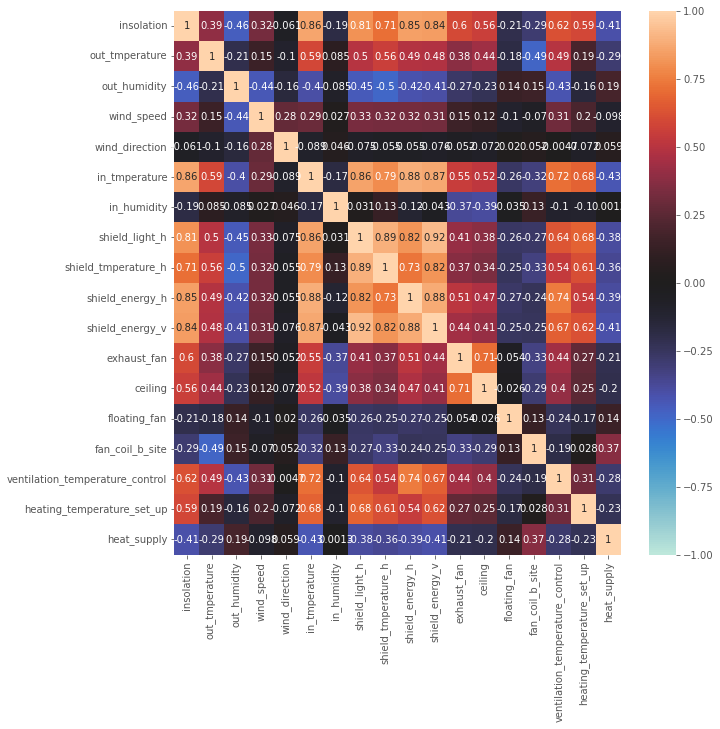

In [91]:
all_df_corr = all_df.drop(['tag','yy','mm','dd','hh','nn'],axis=1).corr()
# all_df_corr = all_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(all_df_corr,vmax=1, vmin=-1, center=0, annot=True)

<AxesSubplot:>

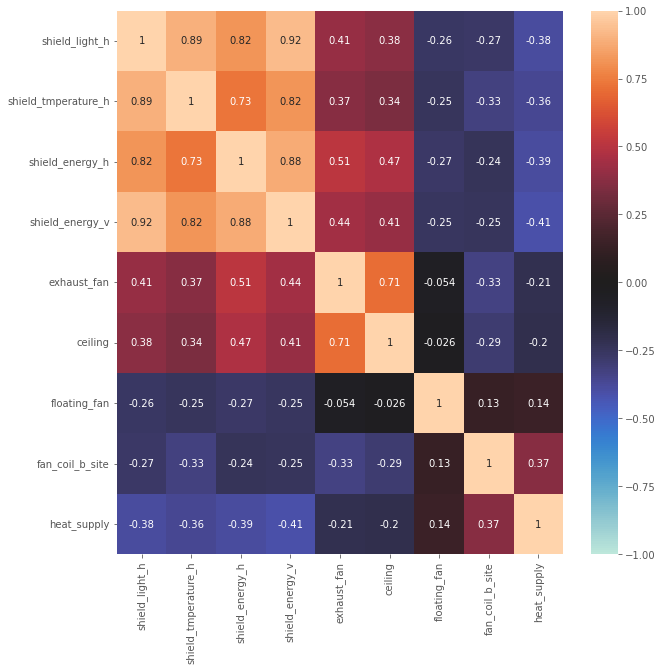

In [92]:
cont_df = all_df[list_control]
cont_df_corr = cont_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cont_df_corr,vmax=1, vmin=-1, center=0, annot=True)

In [93]:
sum_df = all_df.groupby('datetime')['out_tmperature']
sum_df.head()

0         5.8
1         5.8
2         5.7
3         5.7
4         5.7
         ... 
152635    6.2
152636    6.2
152637    6.1
152638    6.1
152639    6.1
Name: out_tmperature, Length: 152640, dtype: float64

In [94]:
all_df['datetime'].dt.hour

0          0
1          0
2          0
3          0
4          0
          ..
152635    23
152636    23
152637    23
152638    23
152639    23
Name: datetime, Length: 152640, dtype: int64

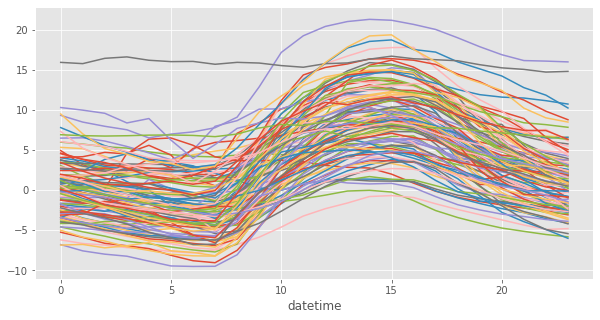

In [117]:
# pivot_time = all_df.pivot_table(index=all_df['datetime'].dt.hour, values='out_tmperature', aggfunc='mean').plot()
fig, ax = plt.subplots(figsize=(10,5))
pivot_time = all_df.pivot_table(index=all_df['datetime'].dt.hour, 
    columns='date',
    values='out_tmperature', aggfunc='mean').plot(ax=ax)
ax.get_legend().remove()

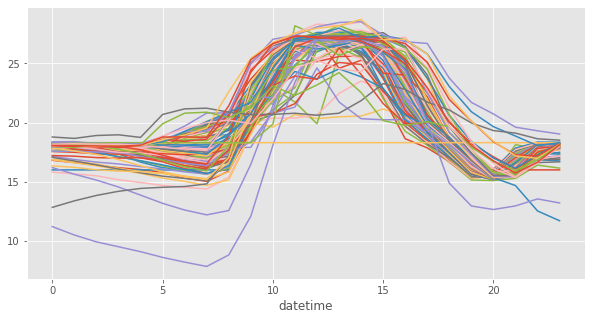

In [118]:
# pivot_time = all_df.pivot_table(index=all_df['datetime'].dt.hour, values='out_tmperature', aggfunc='mean').plot()
fig, ax = plt.subplots(figsize=(10,5))
pivot_time = all_df.pivot_table(index=all_df['datetime'].dt.hour, 
    columns='date',
    values='in_tmperature', aggfunc='mean').plot(ax=ax)
#ax.legend(labels=grouped.groups.keys()) ## better legend
ax.get_legend().remove()
plt.show()

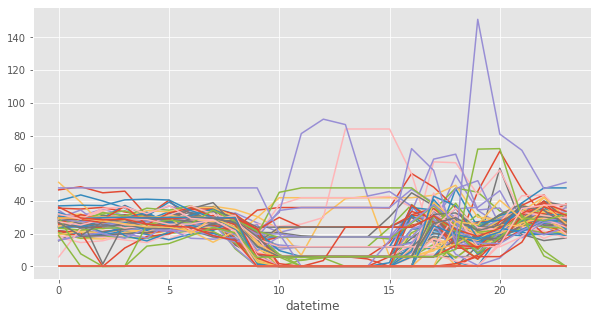

In [119]:
fig, ax = plt.subplots(figsize=(10,5))
pivot_time = all_df.pivot_table(index=all_df['datetime'].dt.hour, 
    columns='date',
    values='heat_supply', aggfunc='sum').plot(ax=ax)
ax.get_legend().remove()
plt.show()

<AxesSubplot:xlabel='time'>

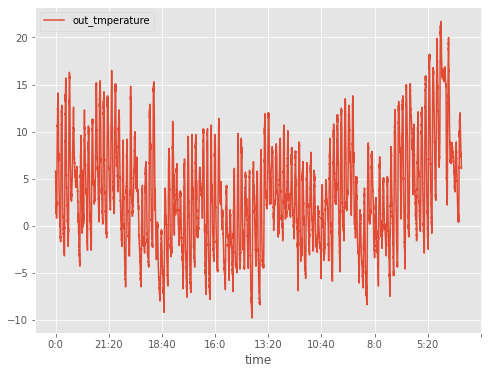

In [105]:
grouped = all_df.groupby('time')
fig, ax = plt.subplots(figsize=(8,6))
all_df.plot(kind='line', x = 'time', y = 'out_tmperature', ax=ax)
# ax.legend(labels=grouped.groups.keys()) ## better legend


<AxesSubplot:xlabel='datetime'>

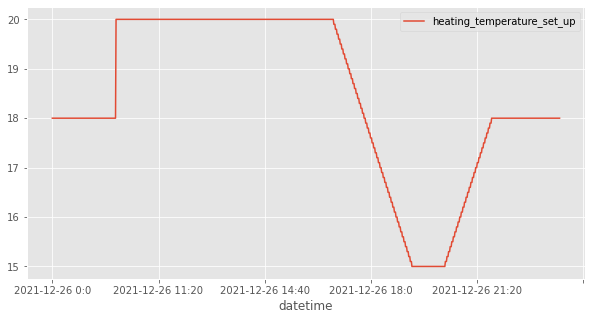

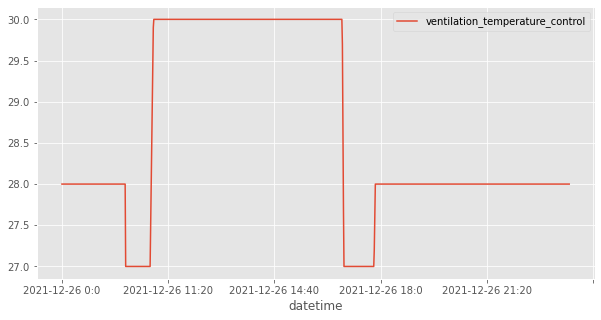

In [18]:
graph_df = all_df[all_df['datetime'].between('2021-12-26 00:00:00', '2021-12-26 23:59:59')]
graph_df[['datetime','out_tmperature','out_humidity','ventilation_temperature_control','heating_temperature_set_up','in_tmperature','out_tmperature','ceiling','heat_supply']].plot(x='datetime',y='heating_temperature_set_up')
graph_df[['datetime','out_tmperature','out_humidity','ventilation_temperature_control','heating_temperature_set_up']].plot(x='datetime',y='ventilation_temperature_control')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


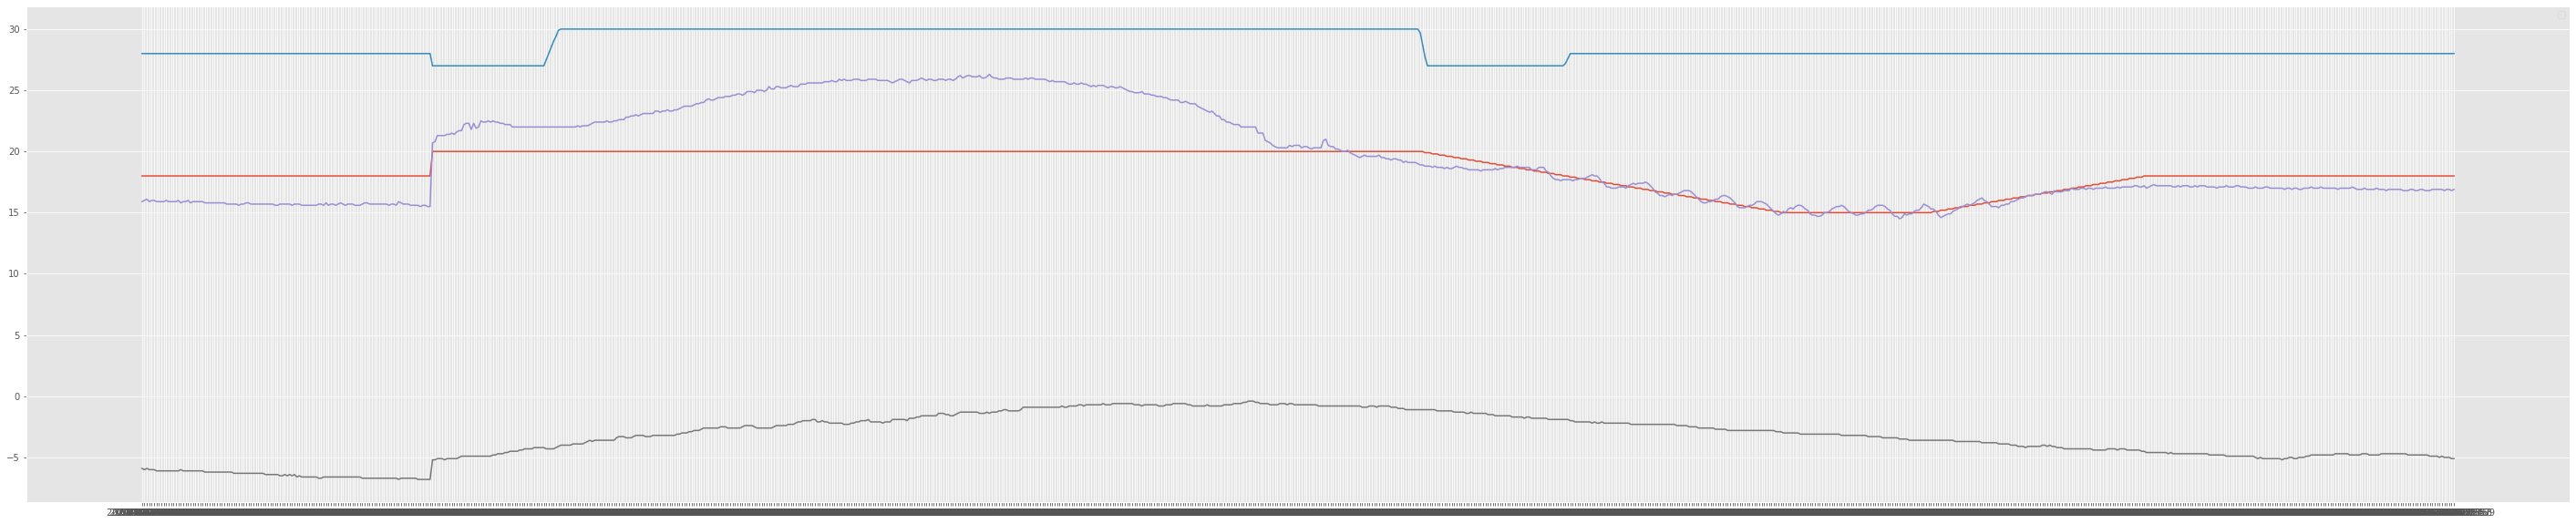

In [19]:
# plt.subplot(1,1,1)
plt.figure(figsize=(50,10))
plt.legend()
plt.plot(graph_df['datetime'],graph_df['heating_temperature_set_up'])
plt.plot(graph_df['datetime'],graph_df['ventilation_temperature_control'])
plt.plot(graph_df['datetime'],graph_df['in_tmperature'])
plt.plot(graph_df['datetime'],graph_df['out_tmperature'])
# plt.plot(graph_df['datetime'],graph_df['ceiling'])
# plt.plot(graph_df['datetime'],graph_df['heat_supply'])
    

In [20]:
all_df.head()

,tag,datetime,date,time,yy,mm,dd,hh,nn,insolation,...,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
0,1,2021-11-26 0:0,2021-11-26,0:0,2021,11,26,0,0,-2.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2,2021-11-26 0:1,2021-11-26,0:1,2021,11,26,0,1,-2.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,3,2021-11-26 0:2,2021-11-26,0:2,2021,11,26,0,2,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,4,2021-11-26 0:3,2021-11-26,0:3,2021,11,26,0,3,-3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,5,2021-11-26 0:4,2021-11-26,0:4,2021,11,26,0,4,-2.8,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


In [21]:
# 결측치 확인
all_df.isnull().sum()

tag                                    0
datetime                               0
date                                   0
time                                   0
yy                                     0
mm                                     0
dd                                     0
hh                                     0
nn                                     0
insolation                             0
out_tmperature                         0
out_humidity                           0
wind_speed                             0
wind_direction                         0
in_tmperature                        526
in_humidity                          526
shield_light_h                       526
shield_tmperature_h                  526
shield_energy_h                      526
shield_energy_v                      526
exhaust_fan                          526
ceiling                              526
floating_fan                         526
fan_coil_b_site                      526
ventilation_temp

In [22]:
all_df[all_df['heat_supply'].isnull()]['datetime'].value_counts()

2021-11-27 17:38    1
2022-3-13 2:27      1
2022-3-13 2:25      1
2022-3-13 2:24      1
2022-3-13 2:23      1
                   ..
2022-3-8 4:42       1
2022-3-8 4:41       1
2022-3-8 4:40       1
2022-3-8 4:39       1
2022-3-20 23:59     1
Name: datetime, Length: 21177, dtype: int64

In [29]:
# all_df.to_csv("mydata/all_df.csv",index=False)

In [30]:
# 스마트팜 내부제어 요소 리스트
List_Control = ['shield_light_h','shield_tmperature_h','shield_energy_h','shield_energy_v','exhaust_fan','ceiling','floating_fan','fan_coil_b_site','heat_supply']

In [31]:
all_df_corr = all_df.drop(['datetime'],axis=1)
all_df_corr = all_df_corr.corr()

In [32]:
cont_df = all_df[List_Control]
cont_df_corr = cont_df.corr()

<AxesSubplot:>

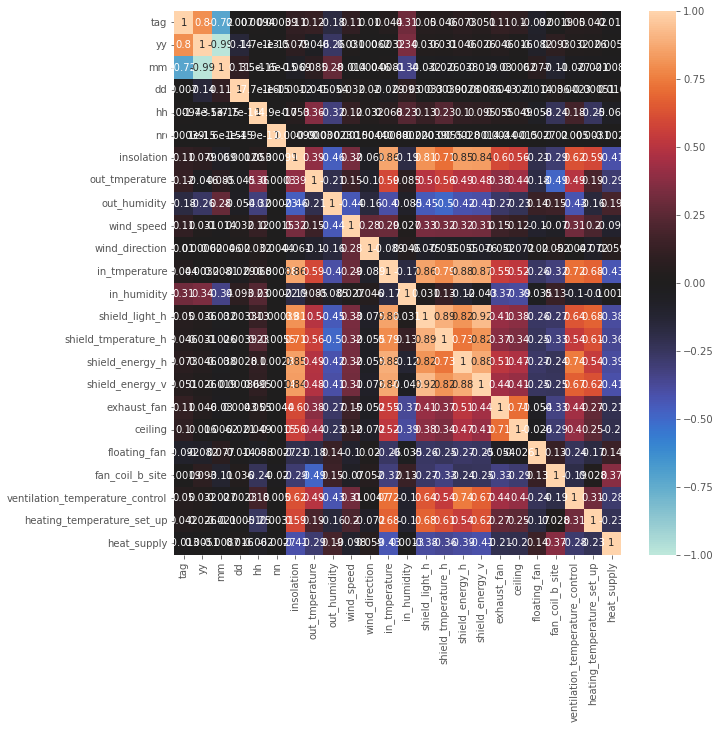

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(all_df_corr,vmax=1, vmin=-1, center=0, annot=True)

<AxesSubplot:>

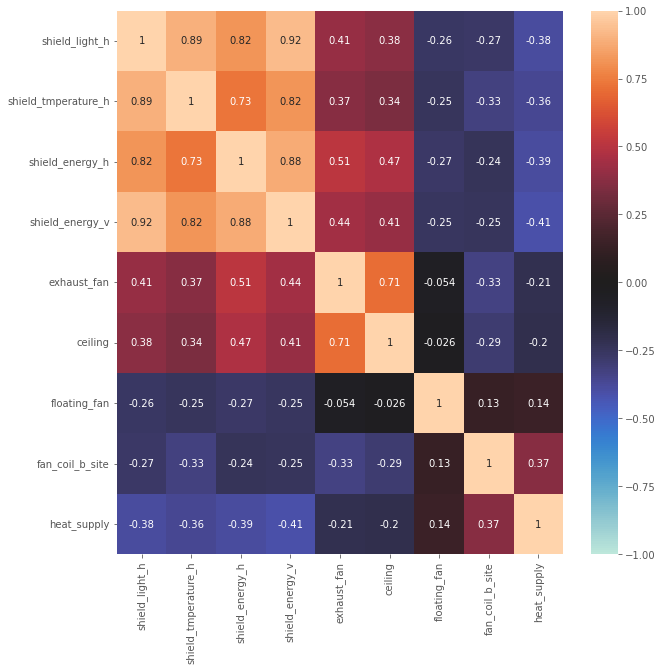

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(cont_df_corr,vmax=1, vmin=-1, center=0, annot=True)

In [38]:
df_time = all_df.pivot_table(index=all_df['datetime'].dt.hour).plot()

AttributeError: Can only use .dt accessor with datetimelike values

In [35]:
all_df_corr['heat_supply'].abs().sort_values(ascending=False)

heat_supply                        1.000000
in_tmperature                      0.433335
shield_energy_v                    0.408185
insolation                         0.408037
shield_energy_h                    0.388191
shield_light_h                     0.384404
fan_coil_b_site                    0.373128
shield_tmperature_h                0.364154
out_tmperature                     0.291589
ventilation_temperature_control    0.282265
heating_temperature_set_up         0.230081
exhaust_fan                        0.214179
ceiling                            0.204157
out_humidity                       0.187190
floating_fan                       0.140951
wind_speed                         0.097829
hh                                 0.062197
wind_direction                     0.059303
dd                                 0.015692
tag                                0.013013
mm                                 0.008736
yy                                 0.005080
nn                              

<AxesSubplot:>

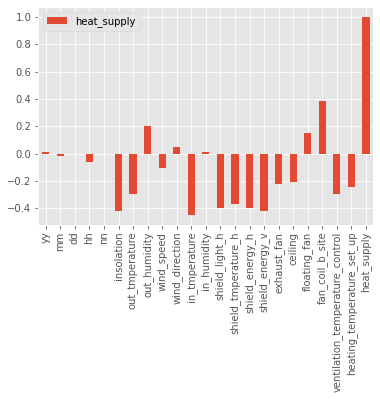

In [ ]:
all_df_corr.plot.bar(y='heat_supply')

In [ ]:
control_per_hour = all_df[['hh','shield_energy_h','shield_energy_v','fan_coil_b_site','shield_light_h','heat_supply']].groupby('hh').mean()
control_per_hour['heat_supply'] = control_per_hour['heat_supply'] * 60
control_per_hour

,shield_energy_h,shield_energy_v,fan_coil_b_site,shield_light_h,heat_supply
hh,,,,,
0,0.000000,0.000000,0.815580,0.000000,28.581081
1,0.000000,0.000000,0.832790,0.000000,27.817467
2,0.000000,0.000000,0.839312,0.000000,27.581908
3,0.000000,0.000000,0.853804,0.000000,28.127810
4,0.000000,0.000000,0.865672,0.000000,27.072856
5,0.000000,0.000000,0.892391,0.000000,27.587179
6,0.000000,0.000000,0.957586,0.000000,28.197812
7,0.000000,0.000000,0.972825,0.000000,28.260256
8,0.135091,11.908545,0.892727,25.797636,24.501282


In [ ]:
from model.train import trainer
from model.predict import predictor
import yaml
with open('model/setting/params.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

In [ ]:
train_df = all_df.dropna()
train_df.to_csv('mydata/train_df.csv',index=False)

In [ ]:
train_X = train_df.drop(['date', 'heat_supply'],axis=1)
train_Y = train_df['heat_supply']

In [ ]:
test1_df = all_df[all_df['date'].between('2021-12-26', '2022-01-01')]
test2_df = all_df[all_df['date'].between('2022-01-23', '2022-01-29')]

test1_df.to_csv("mydata/test1_df.csv",index=False)
test2_df.to_csv("mydata/test2_df.csv",index=False)

test1_X = test1_df.drop(['date', 'heat_supply'],axis=1)
test2_X = test2_df.drop(['date', 'heat_supply'],axis=1)

In [ ]:
test2_df.head()

,date,yy,mm,dd,hh,nn,insolation,out_tmperature,out_humidity,wind_speed,...,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
79200,2022-01-23,2022,1,23,0,0,-2.7,3.0,72,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
79201,2022-01-23,2022,1,23,0,1,-2.7,3.0,72,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
79202,2022-01-23,2022,1,23,0,2,-2.7,3.0,72,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
79203,2022-01-23,2022,1,23,0,3,-2.8,3.0,72,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
79204,2022-01-23,2022,1,23,0,4,-2.8,3.0,72,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [ ]:
tr = trainer()
pred = predictor()

tr.train_lgb(train_X, train_Y, params['lgb'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1458
[LightGBM] [Info] Number of data points in the train set: 88620, number of used features: 22
[LightGBM] [Info] Start training from score 0.352127
[1]	valid_0's l2: 0.144859
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 0.143528
[3]	valid_0's l2: 0.142872
[4]	valid_0's l2: 0.140818
[5]	valid_0's l2: 0.139893
[6]	valid_0's l2: 0.137851
[7]	valid_0's l2: 0.136116
[8]	valid_0's l2: 0.135318
[9]	valid_0's l2: 0.134131
[10]	valid_0's l2: 0.133336
[11]	valid_0's l2: 0.131987
[12]	valid_0's l2: 0.131451
[13]	valid_0's l2: 0.131264
[14]	valid_0's l2: 0.131101
[15]	valid_0's l2: 0.130492
[16]	valid_0's l2: 0.13029
[17]	valid_0's l2: 0.130213
[18]	valid_0's l2: 0.13008
[19]	valid_0's l2: 0.129464
[20]	vali

In [ ]:
pred.predict_lgb(tr.models_lgb[0], test1_X)
pred.predict_lgb(tr.models_lgb[0], test2_X)

In [ ]:
submission = pd.read_csv('submit/submit.csv')

In [ ]:
submission.head()

,yy_from,mm_from,dd_from,yy_to,mm_to,dd_to,heat_supply_sum
0,2022,3,4,2022,3,13,NaN
1,2022,3,18,2022,3,23,NaN


In [ ]:
preds_ans1 = pred.preds_lgb[0].sum()
preds_ans2 = pred.preds_lgb[1].sum()

In [ ]:
submission['heat_supply_sum'] = np.array([preds_ans1,preds_ans2])

In [ ]:
submission.to_csv('submit/220156.csv',index=False)

In [ ]:

cont_df = all_df[List_Control]
cont_df = cont_df.dropna(axis=0)[List_Control]
cont_X = cont_df.iloc[:,:-1]
cont_y = cont_df.iloc[:,-1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cont_X, cont_y, test_size = 0.2, random_state=1)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_pred = model_linear.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print(rmse)


0.2782898764415272


In [ ]:
all_df[['heat_supply','fan_coil_b_site']].head(50)

,heat_supply,fan_coil_b_site
0,0.9,0.0
1,0.9,0.0
2,0.9,1.0
3,0.8,1.0
4,1.0,1.0
5,1.0,1.0
6,0.9,1.0
7,0.8,1.0
8,0.9,1.0
9,0.9,1.0


<AxesSubplot:xlabel='date'>

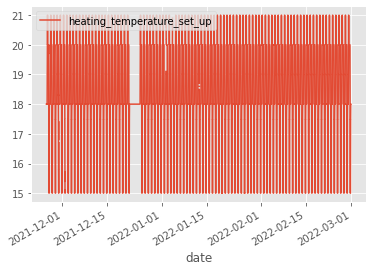